In [1]:
import numpy as np
import matplotlib.pyplot as plt

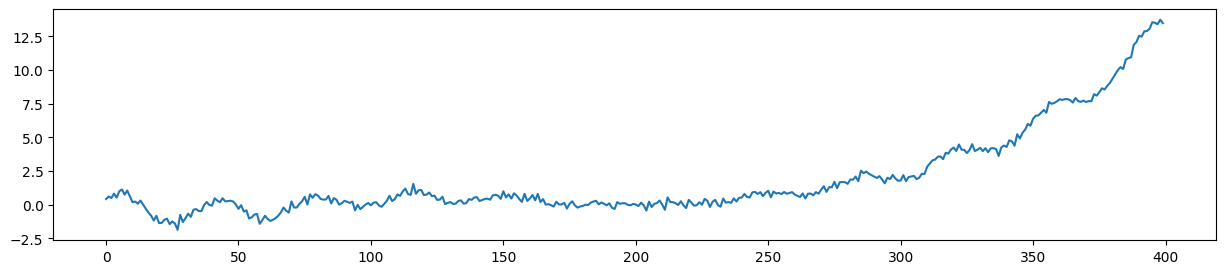

In [12]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(-2,2,ts)
signal = np.sin(t)*t*np.exp(t)+ np.sin(10*t)*t*np.cos(7*t)+np.random.normal(scale=.2, size=len(t))

plt.figure(figsize = (15,3))
_ = plt.plot(signal)


Absolutely, here's a concise summary:

The Fast Fourier Transform (FFT) output has the same shape as the input signal.

Each element of the FFT output is a complex number, composed of a real part and an imaginary part.

The real part of each complex number represents the amplitude (magnitude) of a cosine wave at a certain frequency.

The imaginary part of each complex number represents the amplitude (magnitude) of a sine wave at the same frequency.

The FFT output for real-valued signals is symmetric. Specifically, it's conjugate symmetric, which means the second half of the array (negative frequencies) is the mirror image of the first half (positive frequencies), but with the imaginary parts negated. This means the real part is symmetric around the center and the imaginary part is anti-symmetric around the center.

The k-th element in the FFT output array represents the strength (magnitude) of the cosine and sine waves at the frequency corresponding to the k-th frequency bin. The exact frequency this corresponds to in Hz depends on the length of your signal and your sampling rate. If the length of your signal corresponds to T seconds, then each frequency bin k corresponds to k/T Hz. Therefore, the 4th element corresponds to a frequency of 4/T Hz. The real and imaginary parts give the magnitudes of the cosine and sine components at this frequency, respectively.

In [31]:
def plot(sample_per_second, range_ = [-1, 1]):
    # although the (sample_per_second, range_) changed the result of fft not changed
    # indeed it changed but the meaning not changed
    sampling_interval = 1/sample_per_second
    signal_time = np.arange(*range_,sampling_interval)

    signal = 4*np.sin(2*np.pi*1*signal_time)
    signal += 8*np.cos(2*np.pi*5*signal_time) 
    signal += -2* np.sin(2*np.pi*9*signal_time) 
    signal += -6* np.cos(2*np.pi*14*signal_time)


    fft_result = np.fft.fft(signal)
    T = len(signal_time)/sample_per_second
    freq = np.arange(len(signal_time))/T 

    plt.figure(figsize = (12, 3))

    plt.subplot(141)
    plt.plot(freq, np.abs(fft_result))
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')
    plt.xlim(0, 30)

    plt.subplot(142)
    plt.plot(freq, np.real(fft_result))
    plt.xlabel('Freq (Hz)')
    plt.ylabel('sine')
    plt.xlim(0, 30)

    plt.subplot(143)
    plt.plot(freq, np.imag(fft_result))
    plt.xlabel('Freq (Hz)')
    plt.ylabel('cosine')
    plt.xlim(0, 30)

    plt.subplot(144)
    plt.plot(signal_time, np.fft.ifft(fft_result), 'r')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    _ = plt.show()


    ss = [(idx, a) for idx, a in enumerate(np.real(fft_result)) if abs(a) > 0.1]
    cc = [(idx, a) for idx, a in enumerate(np.imag(fft_result)) if abs(a) > 0.1]
    print(ss)
    print(cc)                   

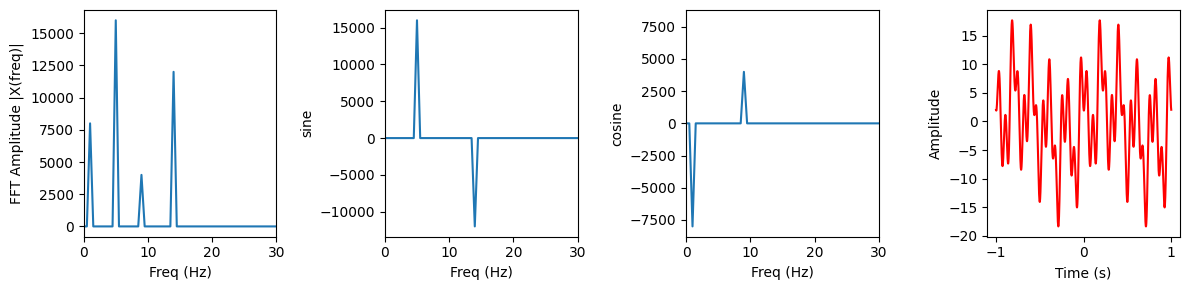

[(10, 16000.00000000214), (28, -11999.999999998832), (3972, -11999.999999998832), (3990, 16000.000000002143)]
[(2, -8000.00000000054), (18, 4000.000000000022), (3982, -4000.000000000022), (3998, 8000.000000000541)]


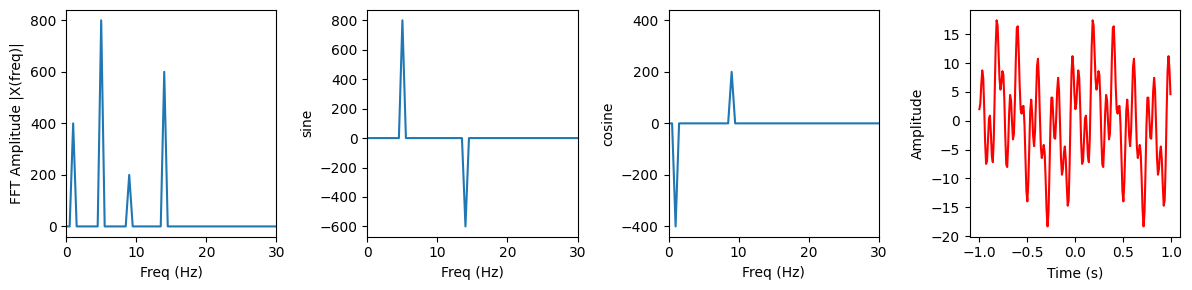

[(10, 799.9999999999997), (28, -600.0000000000001), (172, -600.0000000000001), (190, 799.9999999999997)]
[(2, -399.9999999999998), (18, 200.0), (182, -200.0), (198, 399.9999999999998)]


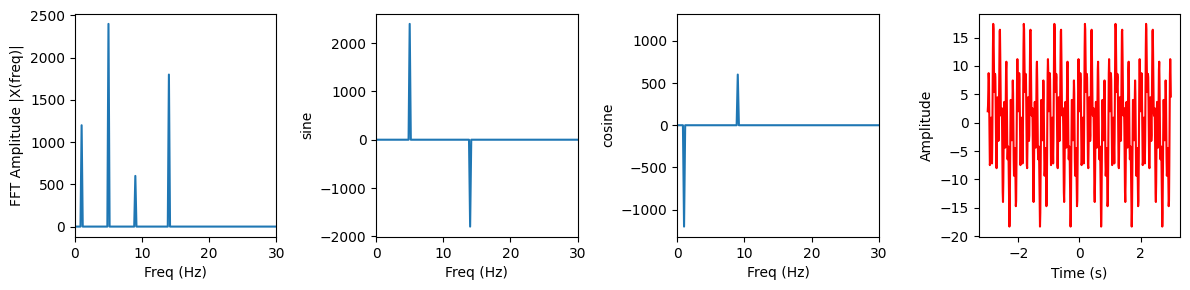

[(30, 2400.0000000000528), (84, -1799.9999999999754), (516, -1799.9999999999754), (570, 2400.0000000000528)]
[(6, -1200.0000000000155), (54, 599.9999999999991), (546, -599.9999999999989), (594, 1200.0000000000157)]


In [33]:
plot(2000, [-1, 1])
plot(100, [-1, 1])
plot(100, [-3, 3])

